<a href="https://colab.research.google.com/github/Harisha-AlmaBetter/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_CLUSTERING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<B>NETFLIX MOVIES AND TV SHOWS CLUSTERING

# <B>Problem Statement

**This** dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

#<b> Import Packages

In [111]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm


%matplotlib inline

# Importing Date & Time util modules
from dateutil.parser import parse

import collections as c


import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#<B>Load & Read the dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
nf=pd.read_csv('/content/drive/MyDrive/Netflix/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [7]:
nf.head(5).append(nf.tail(5))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


After a quick glimpse at the dataset, it looks like a typical movies/shows dataset without user ratings. We can also see that there are NaN values in some columns.

#<B>Checking Shape and Column Names

In [8]:
nf.shape

(7787, 12)

In [9]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<B>To make the column names more meaningful, "listed_in" has been changed to "genres".

In [10]:
nf.rename(columns = {"listed_in":"genres"},inplace = True)
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

<B>Validating Duplicate Records

In [11]:
#Drop duplicates if any
nf=nf.drop_duplicates()
nf.shape

(7787, 12)

<B>No duplicates found.

# **3. Data Preparation and Cleaning**

In [12]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 790.9+ KB


There are 7,787 entries and 12 columns to work with for EDA. Right off the bat, there are a few columns that contain null values ('director', 'cast', 'country', 'date_added', 'rating').

In [13]:
nf.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
genres           492
description     7769
dtype: int64

**Observation**: All the show IDs and Titles are unique whereas others might have been repeated once or more times!

<B>Analyzing basic statistics about each feature, such as count, min, max, and mean.

In [14]:
nf.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


**Observation**


*   Netflix has 25% of movies and TV shows that were released in 2013

*   About 75% of Netflix's content consists of movies and TV shows released after 2013


*   Data from Netflix shows that new trend movies or TV shows are more prevalent.

*   For more subscribers, Netflix should invest in classic Movies and TV shows.

##**Handling Null Values**

We can see that for each of the columns, there are alot different unique values for some of them. It makes sense that show_id is large since it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well.

In [15]:
nf.isnull().values.any()

True

In [16]:
nf.isnull().sum().sum()

3631

In [17]:
nf.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

Above in the heatmap and table, we can see that there are quite a few null values in the dataset. There are a total of 3,631 null values across the entire dataset with 2,389 missing points under 'director', 718 under 'cast', 507 under 'country', 10 under 'date_added', and 7 under 'rating'. We will have to handle all null data points before we can dive into EDA and modeling.

In [18]:
for i in nf.columns:
  null_rate = nf[i].isnull().sum()/len(nf)*100
  if null_rate > 0 :
        print( "{}'s null rate: {}%".format(i, round(null_rate, 2)))

director's null rate: 30.68%
cast's null rate: 9.22%
country's null rate: 6.51%
date_added's null rate: 0.13%
rating's null rate: 0.09%


Observation: As per our earlier analysis, we can see that the 'director' column has the highest whereas 'rating' column has the lowest number of missing values!

In [19]:
nf['director'].fillna('No Director', inplace=True)
nf['cast'].fillna('No Cast', inplace=True)
nf['country'].fillna('Country Unavailable', inplace=True)
nf.dropna(subset=['date_added','rating'],inplace=True)

In [20]:
nf.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
genres          False
description     False
dtype: bool

For null values, the easiest way to get rid of them would be to delete the rows with the missing data. However, this wouldn't be beneficial to our EDA since there is loss of information. 

Since 'director', 'cast', and 'country' contain the majority of null values, we will choose to treat each missing value as unavailable. The other two labels 'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset. After, we can see that there are no more null values in the dataset.

###<B>Splitting the Dataset

Since the dataset can either contain movies or shows, it'd be nice to have datasets for both so we can take a deep dive into just Netflix movies or Netflix TV shows so we will create two new datasets. One for movies and the other one for shows.

In [21]:
nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


In [22]:
nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


Date Added: First, the date is in the following format: 25 September, 2021. This is a text (string) which is not actionable. We need to take the text and turn it into a date format. The second thing we want to do is to seperate the year and place it in a different column which we will call "added_year". This will help me in next steps

Rating: It appears like there is nothing wrong with 'rating'. But, to the outside reader - ratings like 'TV-MA' or 'PG-13' means nothing. We just know that the rating means "for specific audiance". So, we want to conduct a research to understand all the ratings, and then change the text into a more readable, appropriate text

Listed In: simply put, 'genre'. However, we do notice something odd. Values like "International TV Show" or "International Movie" are not genres. These are types of content. So, let's split all the "International" to a different column, and remove them from "listed_in

In [23]:
#adding columns of month and year of addition
nf['year_added'] = pd.DatetimeIndex(nf['date_added']).year
nf['month_added'] = pd.DatetimeIndex(nf['date_added']).month_name()
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


Processing the 'rating' column'. Here we have 2 phases, because not only we need to interpert what every rating means, we also need to change it to a more understandable text. Our course of action will be:

1. Listing all the unique ratings for movies and TV shows apart
2.Check for similarities / differences between TV and movie ratings
3. Interpert what every rating means
4. Decide on new rating categories and change accordingly

In [24]:
'''nf['rating'] = nf['rating'].replace({   'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'})'''

"nf['rating'] = nf['rating'].replace({   'TV-PG': 'Older Kids',\n    'TV-MA': 'Adults',\n    'TV-Y7-FV': 'Older Kids',\n    'TV-Y7': 'Older Kids',\n    'TV-14': 'Teens',\n    'R': 'Adults',\n    'TV-Y': 'Kids',\n    'NR': 'Adults',\n    'PG-13': 'Teens',\n    'TV-G': 'Kids',\n    'PG': 'Older Kids',\n    'G': 'Kids',\n    'UR': 'Adults',\n    'NC-17': 'Adults'})"

Now, let's deal with "International" types:

In [25]:
nf['international'] = nf['genres'].apply(lambda x: "International" in x) 

nf['genres'] = nf['genres'].apply(lambda x: x.split(", ")) 

nf[(nf['type'] == 'TV Show') & (nf['international'] == True)]['genres'].apply(lambda x: x.remove("International TV Shows"))

nf[(nf['type'] == 'Movie') & (nf['international'] == True)]['genres'].apply(lambda x: x.remove("International Movies"))

nf['genres'] = nf['genres'].apply(lambda x: ", ".join(x)) 

Next and final issue is to make sure to replace all NaN values with "Not Available" as we initially wanted

In [26]:
nf = nf.fillna("Not Available")

###<B>Targets based on "rating"


In [27]:
print('TV Shows Ratings:',nf[nf['type'] == 'TV Show']['rating'].unique(),'\n')
print('Movies Ratings:',nf[nf['type'] == 'Movie']['rating'].unique())

TV Shows Ratings: ['TV-MA' 'TV-14' 'TV-PG' 'TV-Y7' 'TV-G' 'TV-Y' 'NR' 'R' 'TV-Y7-FV'] 

Movies Ratings: ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' 'PG' 'G' 'TV-Y7'
 'NC-17' 'TV-Y7-FV' 'UR']


We see here that although all TV shows have a rating that starts with 'TV-' that makes them unique, some of the movie titles also have a rating that starts with 'TV-'. So its a mix.

After research, we decided to categorize the different ratings based on CONTENT (and not AGE). From our understanding, there are 6 content categories in which we want to divide the ratings by:

*   Kids
*   All Ages
*   Teens
*   Brief Violence/Nude
*   Adult Content
*   Unrated

**Classifying the 'rating' feature into three categories. (Kids, Teenagers, Adults)**

TV-Y	Kids

TV-Y7	Kids

TV-Y7-FV	Kids

G	Kids

TV-G	Kids

PG	Kids

TV-PG	Kids

PG-13	Teenagers

TV-14	Teenagers

TV-MA	Adults

R	Adults

NC-17	Adults

NR	Adults

UR	Adults

In [28]:
custom_rating = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

nf['ratings_cat'] = nf['rating'].replace(to_replace = custom_rating)
nf['ratings_cat'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

**Observation:** This looks so much more clear. Using the target_ages column we can easily make out the intended audience for a particular movie!

Let's fix the datatype

In [29]:
#type should be a category
nf['type'] = pd.Categorical(nf['type'])

# ratings_cat is another category (4 classes)
nf['ratings_cat'] = pd.Categorical(nf['ratings_cat'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
nf['year_added'] = pd.to_numeric(nf['year_added'])


In [30]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    nf.iloc[id, 8] = rate
    
nf['rating'].isnull().sum()

0

**Observation:** All the missing values in the ratings column has been fixed!

# **Handling Comma-Delimited Values**

First the is the need to make sure all comma-delimited values were placed in the correct order/form

In [31]:
comma_columns = ['cast','director','country','genres']

for column in comma_columns:
    if len(nf[nf[column].str.startswith(",")]) > 0:
        print("In column:",column,"there are bad entries that BEGIN with a comma")
    if len(nf[nf[column].str.endswith(",")]) > 0:
        print("In column:",column,"there are bad entries that END with a comma")
    if len(nf[nf[column] == '']) > 0:
        print("In column:",column,"there are bad entries that CONTAIN empty values ''")

In column: country there are bad entries that END with a comma
In column: genres there are bad entries that CONTAIN empty values ''


So there are bad entries that needs to be fixed. Let's fix it:

In [32]:
nf[nf['country'].str.endswith(",")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
1402,s1403,Movie,City of Joy,Madeleine Gavin,No Cast,"United States,","September 7, 2018",2018,TV-MA,77 min,Documentaries,Women who've been sexually brutalized in war-t...,2018,September,False,Adults
2315,s2316,Movie,Funan,Denis Do,"Bérénice Bejo, Louis Garrel, Colette Kieffer, ...","France, Belgium, Luxembourg, Cambodia,","July 18, 2020",2018,TV-14,87 min,Dramas,Separated from their young son during the brut...,2020,July,True,Teens
2827,s2828,Movie,Hotel Pacific,Janusz Majewski,"Marek Kondrat, Roman Wilhelmi, Roman Skamene, ...","Poland,","October 1, 2019",1975,TV-MA,96 min,"Classic Movies, Dramas",A motivated teen strives to rise from dishwash...,2019,October,True,Adults
7433,s7434,Movie,Virunga,Orlando von Einsiedel,No Cast,"United Kingdom,","November 7, 2014",2014,TV-MA,100 min,Documentaries,The Oscar-nominated true story of the rangers ...,2014,November,True,Adults


In [33]:
#correcting entries
nf.loc[1402,'country'] = 'United States'
nf.loc[2315,'country'] = 'France, Belgium, Luxembourg, Cambodia'
nf.loc[2827,'country'] = 'Poland'
nf.loc[7433,'country'] = 'United Kingdom'

Having look at empty genres values

In [34]:
nf[nf['genres']=='']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
1707,s1708,Movie,Derren Brown: Miracle,No Director,Derren Brown,United Kingdom,"June 22, 2018",2018,TV-MA,74 min,,Illusionist Derren Brown reinvents the concept...,2018,June,True,Adults
1729,s1730,TV Show,Devlok with Devdutt Pattanaik,No Director,"Rasika Dugal, Devdutt Pattanaik",India,"October 15, 2018",2017,TV-PG,1 Season,,"Through chats with host Rasika Dugal, mytholog...",2018,October,True,Older Kids
2035,s2036,TV Show,Eurovision Song Contest,No Director,"Bar Refaeli, Erez Tal, Assi Azar, Lucy Ayoub",Country Unavailable,"July 23, 2019",2019,TV-PG,1 Season,,Singers from all over Europe represent their c...,2019,July,True,Older Kids
3494,s3495,Movie,La Gran Ilusión,Antonio Díaz,Antonio Díaz,Country Unavailable,"October 28, 2020",2016,TV-14,50 min,,"Known as ""El Mago Pop,"" illusionist Antonio Dí...",2020,October,True,Teens
4341,s4342,Movie,My Next Guest with David Letterman and Shah Ru...,Michael Steed,"Shah Rukh Khan, David Letterman",Country Unavailable,"October 25, 2019",2019,TV-PG,61 min,,"""King of Bollywood"" Shah Rukh Khan opens up ab...",2019,October,True,Older Kids


In [35]:
#filling up entries by getting idea from description
nf.loc[1707,'genres'] = 'Sci-Fi & Fantasy'
nf.loc[1729,'genres'] = 'Stand-Up Comedy'
nf.loc[2035,'genres'] = 'Reality TV'
nf.loc[3494,'genres'] = 'Sci-Fi & Fantasy'
nf.loc[4341,'genres'] = 'Stand-Up Comedy & Talk Shows'

In [36]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",In a future where the elite inhabit an island ...,2020,August,True,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,True,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,True,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,False,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,False,Teens


In [37]:
nf_movies = nf[nf['type']=='Movie'].copy()
nf_movies.duration = nf_movies.duration.str.replace(' min','').astype(int)
nf_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,True,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,True,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,False,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January,False,Teens
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,True,Adults


In the duration column, there appears to be a discrepancy between movies and shows. Movies are based on the duration of the movie and shows are based on the number of seasons. To make EDA easier, we will convert the values in these columns into integers for both the movies and shows datasets.

In [38]:
nf_shows = nf[nf['type']=='TV Show'].copy()
nf_shows.rename(columns={'duration':'seasons'}, inplace=True)
nf_shows.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
nf_shows.seasons = nf_shows.seasons.str.replace(' Seasons','').astype(int)
nf_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,seasons,genres,description,year_added,month_added,international,ratings_cat
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4,"TV Dramas, TV Sci-Fi & Fantasy",In a future where the elite inhabit an island ...,2020,August,True,Adults
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1,"TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July,True,Adults
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1,"Crime TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,November,True,Adults
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1,"Crime TV Shows, Docuseries",Archival video and new interviews examine Mexi...,2019,May,True,Adults
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1,TV Dramas,"As a psychology professor faces Alzheimer's, h...",2019,March,True,Teens


###<B>Removing punctuations


In [39]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [40]:
nf['description'] = nf['description'].apply(remove_punctuation)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",In a future where the elite inhabit an island ...,2020,August,True,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,True,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,When an army recruit is found dead his fellow ...,2018,December,True,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017,November,False,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become cardcount...,2020,January,False,Teens


##<B>Removing stopwords

In [41]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [42]:
print("Number of stopwords in english : ", len(sw))


Number of stopwords in english :  179


In [43]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [44]:
nf['description'] = nf['description'].apply( remove_stopwords )
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",future elite inhabit island paradise far crowd...,2020,August,True,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,devastating earthquake hits mexico city trappe...,2016,December,True,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,army recruit found dead fellow soldiers forced...,2018,December,True,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017,November,False,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group students become cardcounting e...,2020,January,False,Teens


###Now, we have all the values of description are punctutation free and stopword free.

###<B>Using CountVectorizer() to count vocabulary items

In [45]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(nf['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [46]:
dictionary

dict_items([('future', 7149), ('elite', 5638), ('inhabit', 8940), ('island', 9216), ('paradise', 12662), ('far', 6394), ('crowded', 4228), ('slums', 16080), ('get', 7345), ('one', 12291), ('chance', 3059), ('join', 9434), ('saved', 15184), ('squalor', 16495), ('devastating', 4822), ('earthquake', 5487), ('hits', 8301), ('mexico', 11093), ('city', 3325), ('trapped', 17897), ('survivors', 17043), ('walks', 18855), ('life', 10163), ('wait', 18832), ('rescued', 14501), ('trying', 18039), ('desperately', 4775), ('stay', 16604), ('alive', 781), ('army', 1222), ('recruit', 14221), ('found', 6933), ('dead', 4489), ('fellow', 6520), ('soldiers', 16205), ('forced', 6869), ('confront', 3778), ('terrifying', 17419), ('secret', 15372), ('thats', 17473), ('haunting', 8006), ('jungle', 9529), ('training', 17854), ('camp', 2750), ('postapocalyptic', 13341), ('world', 19292), ('ragdoll', 13940), ('robots', 14827), ('hide', 8181), ('fear', 6473), ('dangerous', 4416), ('machines', 10520), ('exterminate',

In [47]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

###<B>Creating a new DataFrame vocab_before_stemming


In [48]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [49]:
vocab_before_stemming.head(4)

,Word,count
18845,şeref,19585
10379,ōarai,19584
12367,łukasz,19583
11090,überelite,19582


In [50]:
vocab_before_stemming.head(20).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859,19547,6528,19582,16402,7184,18385,19572,19579,10282,18059
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574,19573,19572,19571,19570,19569,19568,19567,19566


In [51]:
vocab_before_stemming.tail(4)


,Word,count
639,100,3
7608,10,2
7954,009,1
6859,007,0


###<B>TOP 10 most occurred words

In [52]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [53]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [54]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19585, 19584, 19583, 19582, 19581, 19580, 19579, 19578, 19577,
       19576, 19575, 19574, 19573, 19572, 19571])

<BarContainer object of 15 artists>

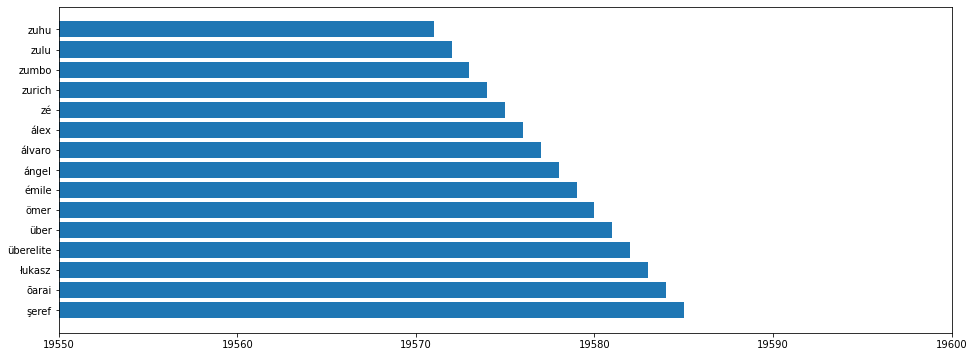

In [55]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

##<B>SnowballStemmer( 'english' )

In [56]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [57]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [58]:
#Stemming for description
nf['description'] = nf['description'].apply( Apply_stemming )
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",futur elit inhabit island paradis far crowd sl...,2020,August,True,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,devast earthquak hit mexico citi trap survivor...,2016,December,True,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,armi recruit found dead fellow soldier forc co...,2018,December,True,Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,2017,November,False,Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,January,False,Teens


##<B>Now again will use TfidfVectorizer (after stemming)


In [59]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(nf['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [60]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

###<B>Creating a new DataFrame vocab_after_stemming

In [61]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [62]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)


In [63]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [64]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14233, 14232, 14231, 14230, 14229, 14228, 14227, 14226, 14225,
       14224, 14223, 14222, 14221, 14220, 14219])

<BarContainer object of 15 artists>

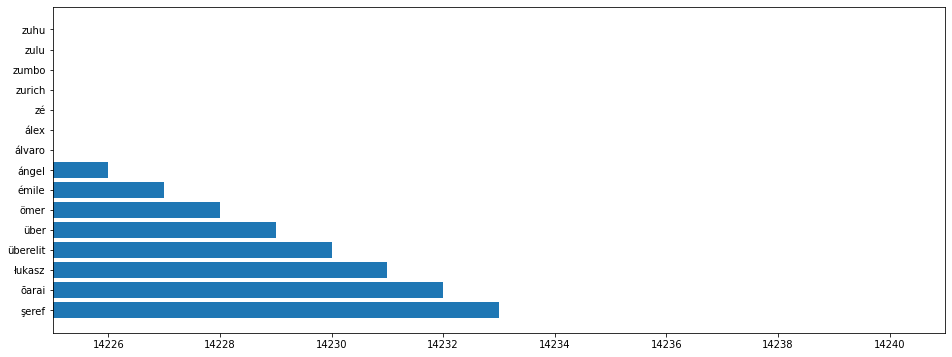

In [65]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

##<B>Adding a new column length which will contain length of description

In [66]:
nf['Length(description)'] = nf['description'].apply(lambda x: len(x))


In [67]:
nf.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat,Length(description)
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"TV Dramas, TV Sci-Fi & Fantasy",futur elit inhabit island paradis far crowd sl...,2020,August,True,Adults,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,devast earthquak hit mexico citi trap survivor...,2016,December,True,Adults,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,armi recruit found dead fellow soldier forc co...,2018,December,True,Adults,102


In [68]:
nf.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [69]:
len(nf.description.iloc[0])


82

In [70]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'international', 'ratings_cat',
       'Length(description)'],
      dtype='object')

In [72]:
nf['genres'] = nf['genres'].apply(remove_punctuation)
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat,Length(description)
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,TV Dramas TV SciFi Fantasy,futur elit inhabit island paradis far crowd sl...,2020,August,True,Adults,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,devast earthquak hit mexico citi trap survivor...,2016,December,True,Adults,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,armi recruit found dead fellow soldier forc co...,2018,December,True,Adults,102
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,2017,November,False,Teens,89
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,brilliant group student becom cardcount expert...,2020,January,False,Teens,99


##<B>Removing stopwords

In [74]:
#Remove stopwords for genres
nf['genres'] = nf['genres'].apply( remove_stopwords )
nf.head( 2 )

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat,Length(description)
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,2020,August,True,Adults,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,dramas,devast earthquak hit mexico citi trap survivor...,2016,December,True,Adults,88


##<B>Using CountVectorizer() to count vocabulary items


In [75]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(nf['genres'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [76]:
dictionary


dict_items([('tv', 40), ('dramas', 12), ('scifi', 30), ('fantasy', 15), ('horror', 17), ('movies', 22), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 25), ('thrillers', 39), ('crime', 8), ('shows', 32), ('docuseries', 11), ('documentaries', 10), ('sports', 35), ('comedies', 6), ('anime', 2), ('series', 31), ('reality', 27), ('romantic', 28), ('science', 29), ('nature', 26), ('british', 3), ('korean', 20), ('music', 23), ('musicals', 24), ('lgbtq', 21), ('faith', 13), ('spirituality', 34), ('kids', 19), ('spanishlanguage', 33), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 36), ('comedy', 7), ('talk', 37), ('teen', 38), ('features', 16)])

In [77]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [78]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [79]:
listed_in_vocab_before_stem.head()


,Word,count
0,tv,40
10,thrillers,39
39,teen,38
38,talk,37
36,standup,36


In [80]:
listed_in_vocab_before_stem.tail()


,Word,count
32,children,4
23,british,3
17,anime,2
7,adventure,1
6,action,0


##<B>TOP 10 most occurred words in listed in


In [81]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)


In [82]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [83]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26])

<BarContainer object of 15 artists>

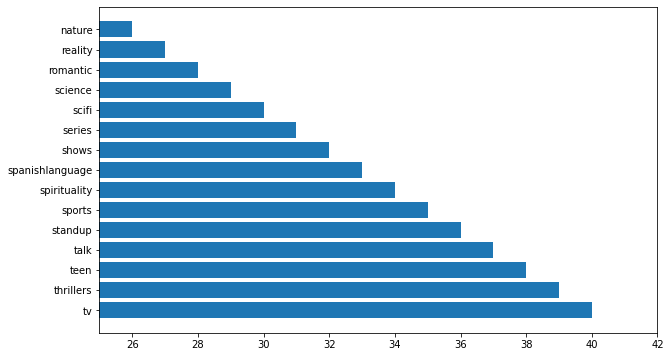

In [84]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

##<B>Now will use SnowballStemmer( 'english' )


In [85]:
#Stemming for description
nf['genres'] = nf['genres'].apply( Apply_stemming )
nf.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat,Length(description)
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,August,True,Adults,82
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,drama,devast earthquak hit mexico citi trap survivor...,2016,December,True,Adults,88
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movi,armi recruit found dead fellow soldier forc co...,2018,December,True,Adults,102


##<B>Now will use TfidfVectorizer (after stemming)


In [86]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(nf['genres'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [87]:
dictionary


dict_items([('tv', 38), ('drama', 11), ('scifi', 28), ('fantasi', 14), ('horror', 16), ('movi', 21), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 23), ('thriller', 37), ('crime', 7), ('show', 30), ('docuseri', 10), ('documentari', 9), ('sport', 33), ('comedi', 6), ('anim', 2), ('seri', 29), ('realiti', 25), ('romant', 26), ('scienc', 27), ('natur', 24), ('british', 3), ('korean', 19), ('music', 22), ('lgbtq', 20), ('faith', 12), ('spiritu', 32), ('kid', 18), ('spanishlanguag', 31), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 34), ('talk', 35), ('teen', 36), ('featur', 15)])

In [88]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

###<B>Creating a new DataFrame vocab_after_stemming_listed_in


In [89]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [90]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)


In [91]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [92]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24])

###<B>Plot of the top vocab present in listed_in (after stemming)


<BarContainer object of 15 artists>

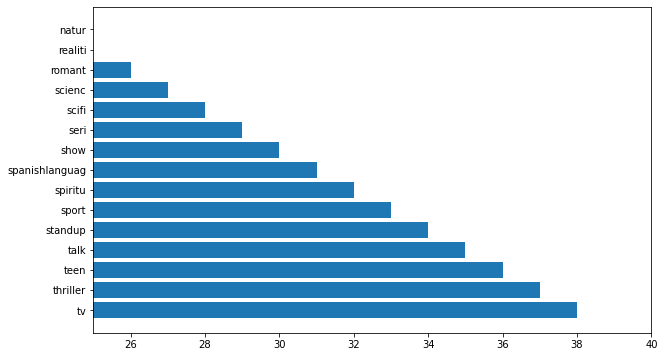

In [93]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

####<B>Adding a new column length( listed-in ) which will contain length of listed_in

In [95]:
nf['Length(genres)'] = nf['genres'].apply(lambda x: len(x))
nf.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,year_added,month_added,international,ratings_cat,Length(description),Length(genres)
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,2020,August,True,Adults,82,25
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,drama,devast earthquak hit mexico citi trap survivor...,2016,December,True,Adults,88,5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,horror movi,armi recruit found dead fellow soldier forc co...,2018,December,True,Adults,102,11


In [96]:
nf.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'international', 'ratings_cat',
       'Length(description)', 'Length(genres)'],
      dtype='object')

In [97]:
nf[['description', 'Length(description)', 'genres' ,'Length(genres)' ]].head(3)

,description,Length(description),genres,Length(genres)
0,futur elit inhabit island paradis far crowd sl...,82,tv drama tv scifi fantasi,25
1,devast earthquak hit mexico citi trap survivor...,88,drama,5
2,armi recruit found dead fellow soldier forc co...,102,horror movi,11


#<B>Applying Different Clustering Algorithms


**Clustering:**

Clustering can be considered the most important unsupervised learning problem. So, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”.

A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

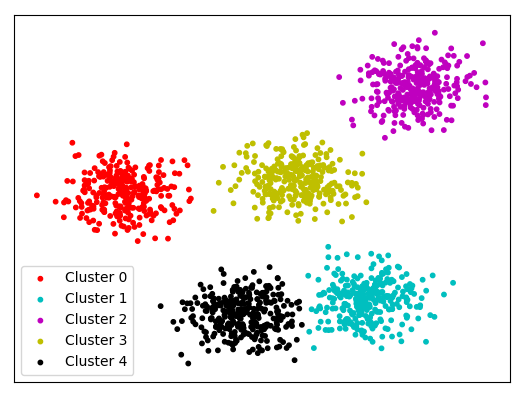

##<B> We have used 5 Clustering algo:
### 1. Silhouette score
### 2. Elbow Method
### 3. DBSCAN
### 4. Dendrogram
### 5. AgglomerativeClustering

##<B>1.Silhouette Score

In [99]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description',
       'year_added', 'month_added', 'international', 'ratings_cat',
       'Length(description)', 'Length(genres)'],
      dtype='object')

In [102]:
X_features_rec = nf[['Length(description)','Length(genres)']]
stdscaler = preprocessing.StandardScaler()

In [103]:
X_features_rec.describe()

,Length(description),Length(genres)
count,7770.000000,7770.000000
mean,93.012484,18.277735
std,10.775430,9.113991
min,25.000000,4.000000
25%,87.000000,11.000000
50%,93.000000,18.000000
75%,100.000000,24.000000
max,185.000000,55.000000


In [104]:
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale
silhouette_score_ = [  ]
range_n_clusters = [i for i in range(2,16)]

In [105]:
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    silhouette_score_.append([int(n_clusters) , round(score , 3)])
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.33133221347054675
For n_clusters = 3, silhouette score is 0.34116923585793907
For n_clusters = 4, silhouette score is 0.31979228267800874
For n_clusters = 5, silhouette score is 0.33276347217739627
For n_clusters = 6, silhouette score is 0.3399126179224207
For n_clusters = 7, silhouette score is 0.3397172123550039
For n_clusters = 8, silhouette score is 0.34082484748991837
For n_clusters = 9, silhouette score is 0.33838888661952765
For n_clusters = 10, silhouette score is 0.3303480174224589
For n_clusters = 11, silhouette score is 0.3345621422908323
For n_clusters = 12, silhouette score is 0.33522678577769177
For n_clusters = 13, silhouette score is 0.33935593287153565
For n_clusters = 14, silhouette score is 0.33782133994894975
For n_clusters = 15, silhouette score is 0.3405597616888565


In [106]:
temp = pd.DataFrame(silhouette_score_ , columns = ["n clusters" , "silhouette score"])
temp = temp.sort_values( "silhouette score" , ascending = False )
temp.head(14)

,n clusters,silhouette score
1,3,0.341
6,8,0.341
13,15,0.341
4,6,0.340
5,7,0.340
11,13,0.339
7,9,0.338
12,14,0.338
9,11,0.335
10,12,0.335


**NOTE :-**

The value of the silhouette coefﬁcient is between [-1, 1]. A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. The worst value is -1. Values near 0 denote overlapping clusters

For n_clusters = 2 The average silhouette_score is : 0.33103154003210644
For n_clusters = 3 The average silhouette_score is : 0.3417740870595827
For n_clusters = 4 The average silhouette_score is : 0.3205573062845181
For n_clusters = 5 The average silhouette_score is : 0.3335282555536347
For n_clusters = 6 The average silhouette_score is : 0.34007623187565444
For n_clusters = 7 The average silhouette_score is : 0.3418061639683865
For n_clusters = 8 The average silhouette_score is : 0.3405795110132346
For n_clusters = 9 The average silhouette_score is : 0.3380200840922139
For n_clusters = 10 The average silhouette_score is : 0.334298344472265
For n_clusters = 11 The average silhouette_score is : 0.3365446734791973
For n_clusters = 12 The average silhouette_score is : 0.33908523027289017
For n_clusters = 13 The average silhouette_score is : 0.3385972646573066
For n_clusters = 14 The average silhouette_score is : 0.3368645838220273
For n_clusters = 15 The average silhouette_score is : 0.3

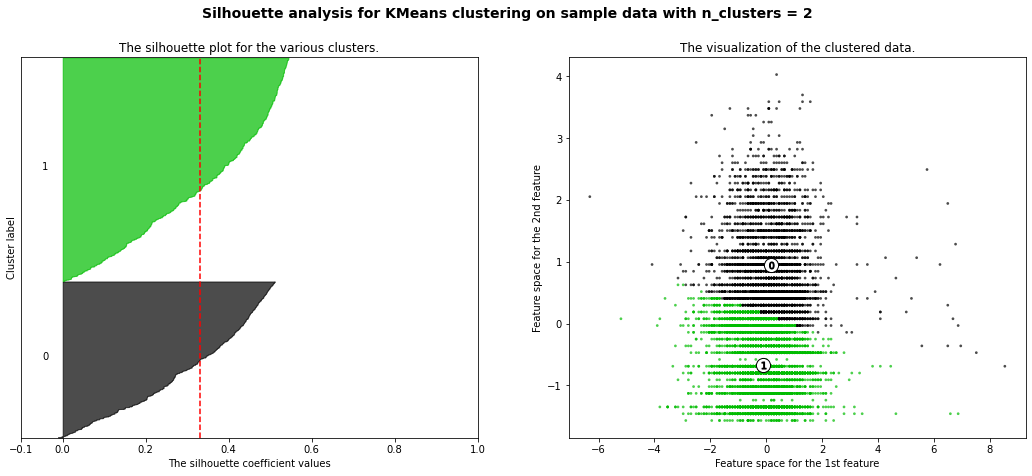

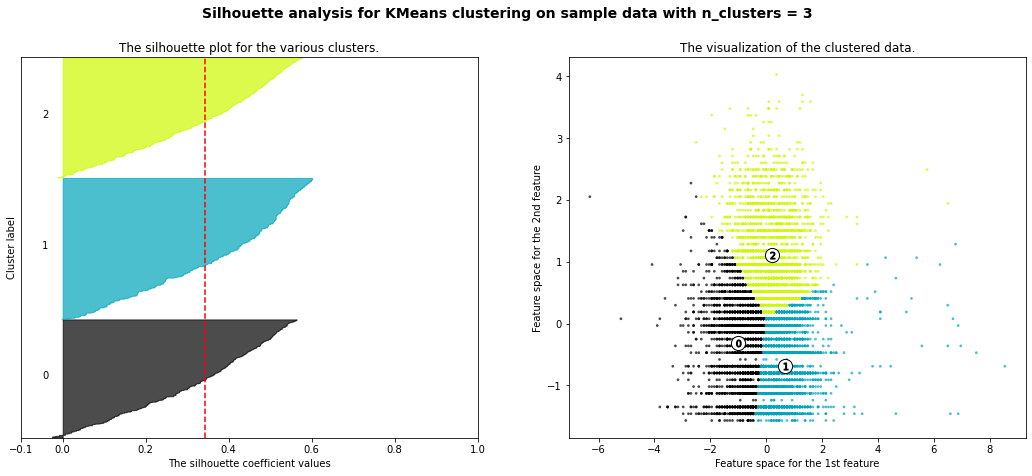

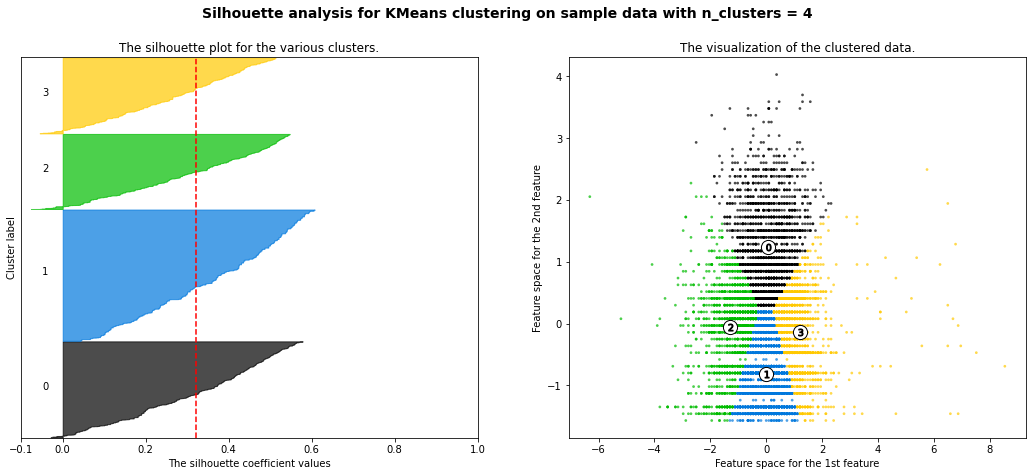

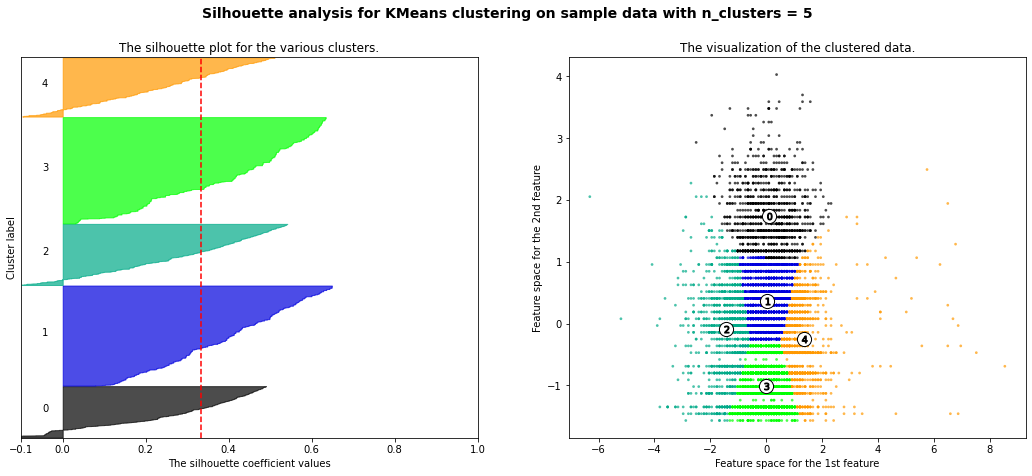

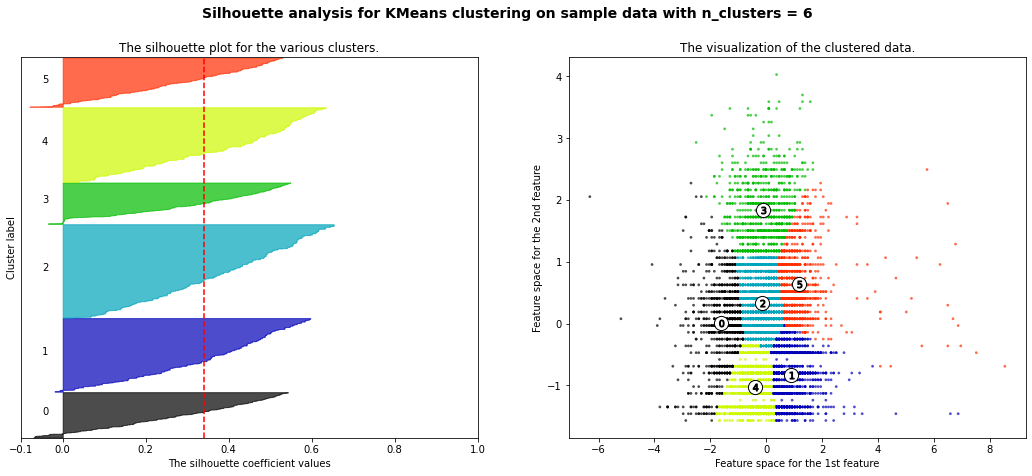

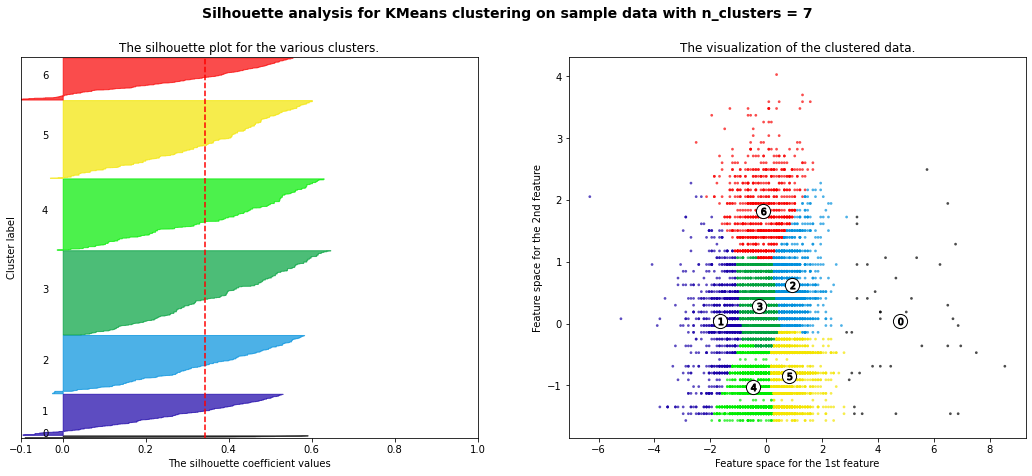

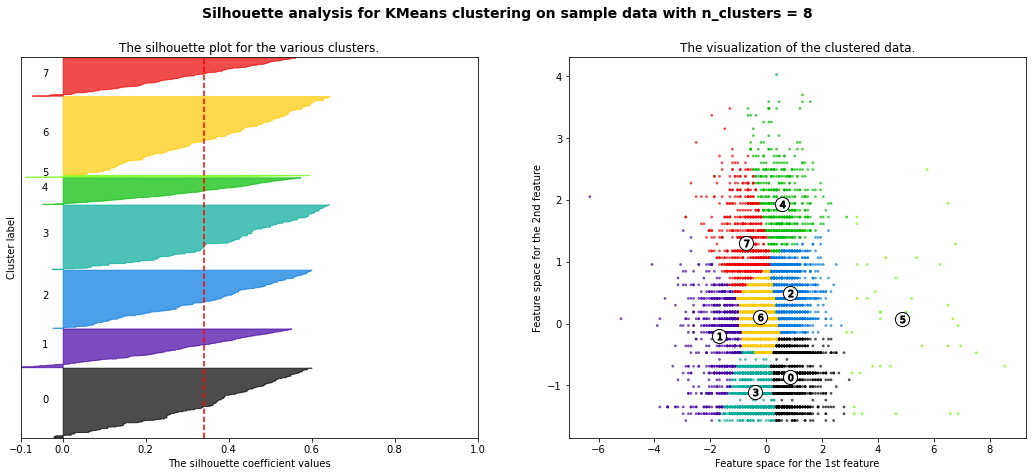

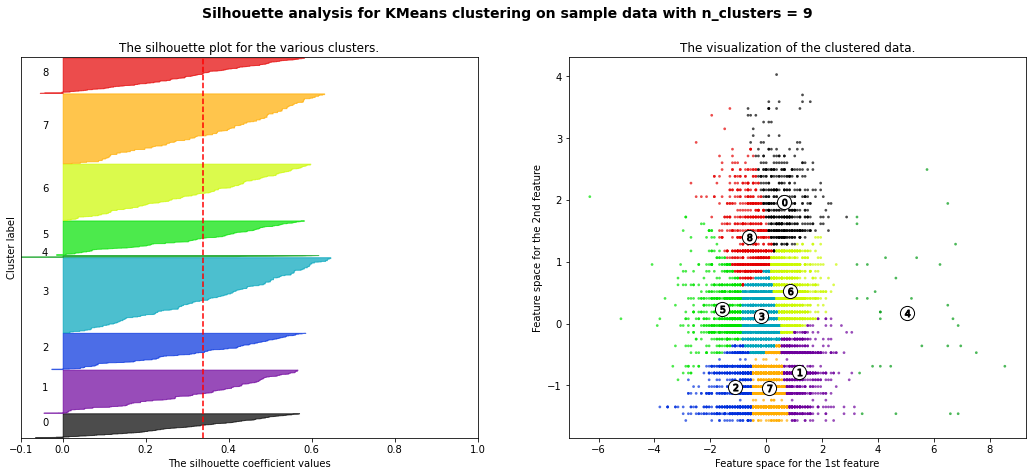

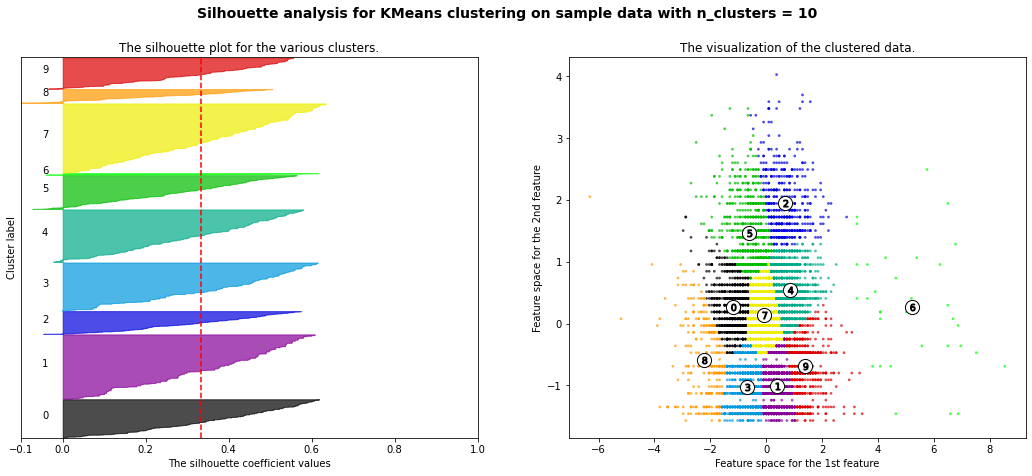

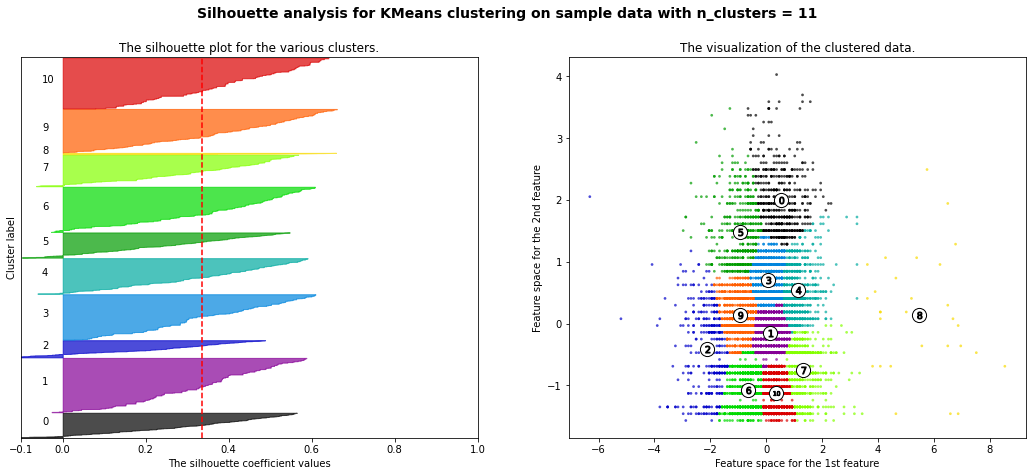

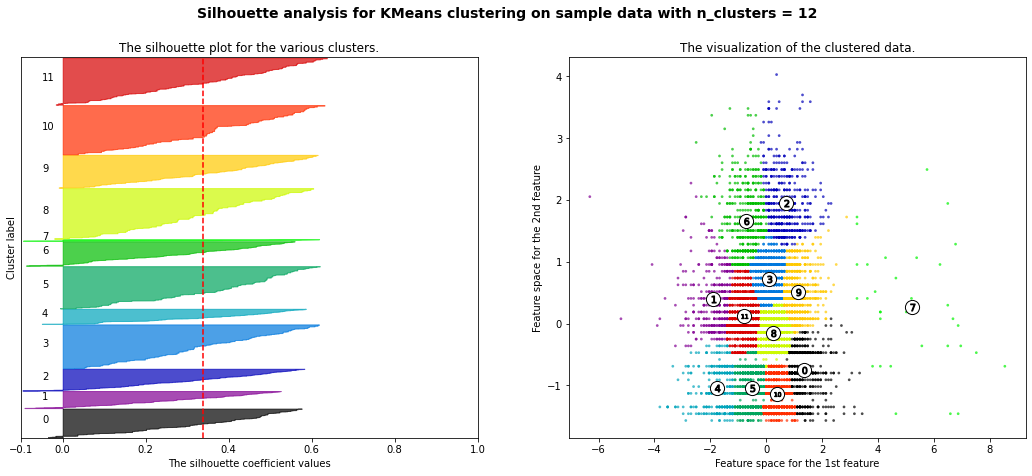

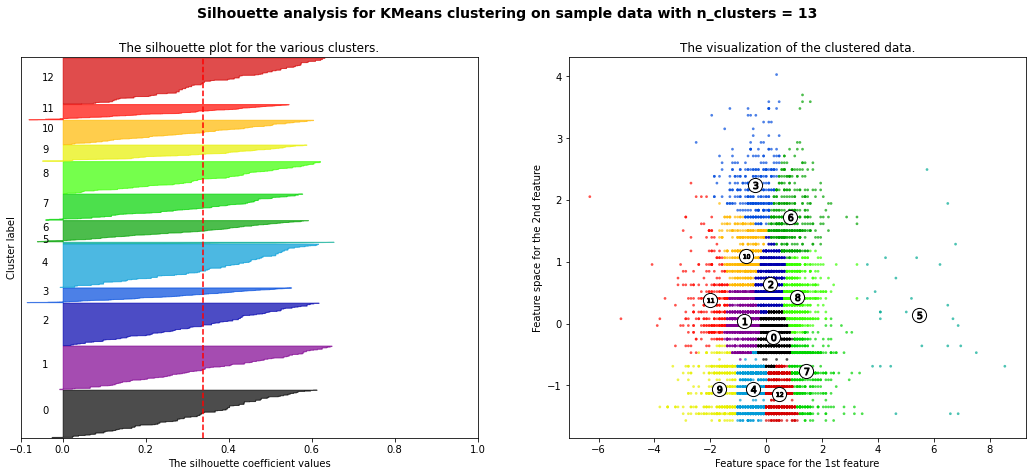

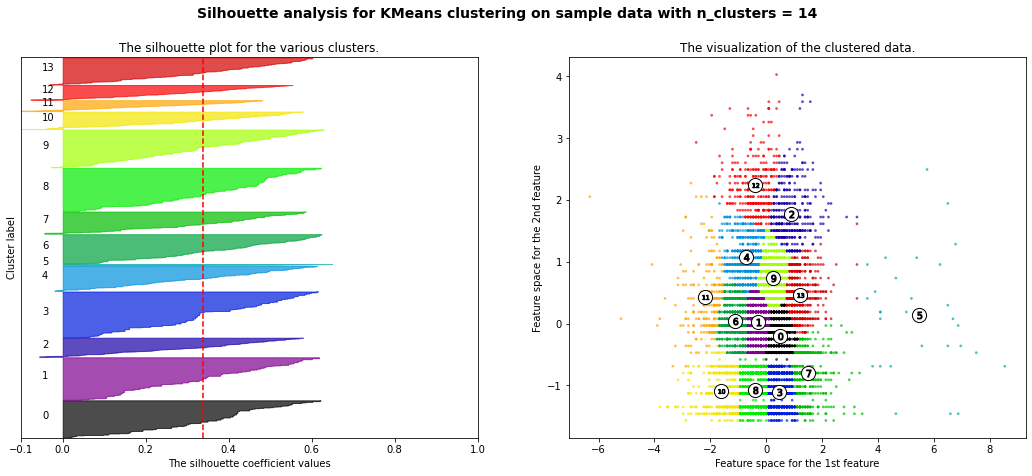

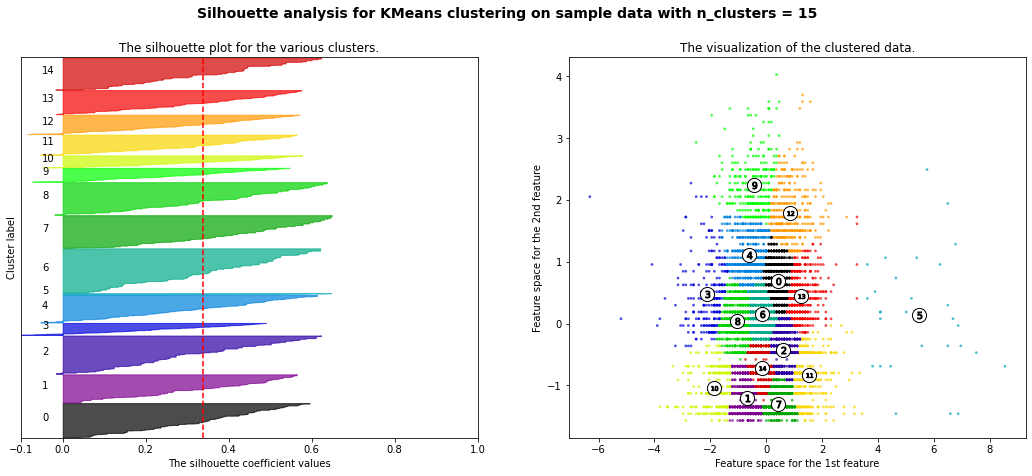

In [112]:
range_n_clusters = [i for i in range(2,16)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is  S=(b−a)/max(a,b) .

# **6.2 Elbow Method**

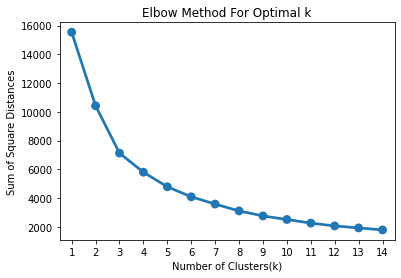

In [108]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Will be using **3 clusters**

In [109]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

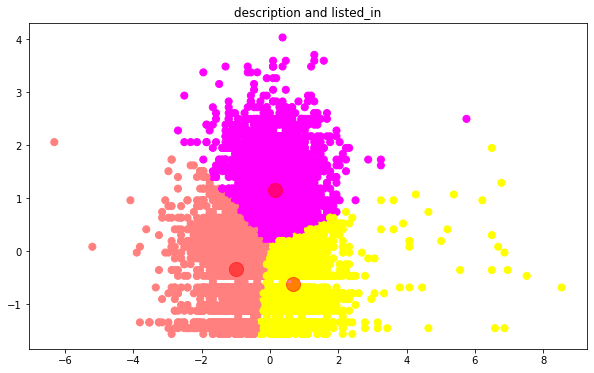

In [110]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)